In [35]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])
station = weather[weather['station_nbr'] == 1]

In [36]:
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
1030,1,2014-10-27,61.0,41.0,51.0,NaN,38.0,44.0,14.0,0.0,...,27,60.947558,48.266239,NaN,0,0,0,0,0,1
1031,1,2014-10-28,65.0,37.0,51.0,NaN,45.0,48.0,14.0,0.0,...,28,79.853021,50.316460,NaN,1,0,1,1,0,0
1032,1,2014-10-29,66.0,48.0,57.0,NaN,51.0,53.0,8.0,0.0,...,29,80.320545,56.738033,NaN,2,0,2,1,0,0
1033,1,2014-10-30,57.0,39.0,48.0,NaN,39.0,43.0,17.0,0.0,...,30,70.872191,46.795606,NaN,3,0,0,0,0,1
1034,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,31,66.647959,43.613607,NaN,4,0,0,0,0,1


In [37]:
len(station)

1035

In [38]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 1035 ( 100.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 4 ( 0.39 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 1035 ( 100.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [39]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [40]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [41]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
103114,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,107,0
103115,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,108,0
103116,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,109,0
103117,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,110,0
103118,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,NaN,4,0,0,0,0,1,1,111,0


In [42]:
station['log1p_units'] = np.log1p(station.units)

In [43]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 다시 OLS

In [44]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
103114,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,107
103115,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,108
103116,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,109
103117,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,110
103118,1,2014-10-31,53.0,40.0,46.5,NaN,36.0,41.0,18.0,0.0,...,43.613607,NaN,4,0,0,0,0,1,1,111


In [45]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [46]:
df2.to_csv("station1.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [13]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + C(year) + C(month) + relative_humility + windchill + weekend \
                            + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     961.6
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:15:56   Log-Likelihood:            -2.2815e+05
No. Observations:              102675   AIC:                         4.567e+05
Df Residuals:                  102501   BIC:                         4.583e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]     -2.4015      1

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [15]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     961.6
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:17:00   Log-Likelihood:            -2.2815e+05
No. Observations:              102675   AIC:                         4.567e+05
Df Residuals:                  102501   BIC:                         4.583e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [16]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

1173

In [17]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
0,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,1,0
1,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,2,0
2,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,3,0
3,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,4,0
4,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,5,0
5,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,6,0
6,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,7,0
7,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,8,0
8,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,9,29
9,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,10,0


In [18]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1123.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:17:27   Log-Likelihood:            -1.2877e+05
No. Observations:              101508   AIC:                         2.579e+05
Df Residuals:                  101334   BIC:                         2.596e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

R square 약간 상승, conditional number에 전혀 변화가 없다...

### 3-1. OLS :  df1 (units) - 아웃라이어 제거 + tmax/tmin/tavg 제거 + dewpoint/wetbulb제거 + stnpressure/sealevel제거 + resultdir제거

In [27]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     1474.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:03:20   Log-Likelihood:            -1.2930e+05
No. Observations:              101946   AIC:                         2.589e+05
Df Residuals:                  101813   BIC:                         2.601e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

### 4. 변수변환 : df2 (log1p_units) 

In [19]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     2211.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:18:08   Log-Likelihood:                 31839.
No. Observations:              102675   AIC:                        -6.333e+04
Df Residuals:                  102501   BIC:                        -6.167e+04
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야할 거 같다.

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [20]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

2892

In [21]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
0,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,1,0.000000
1,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,2,0.000000
2,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,3,0.000000
3,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,4,0.000000
4,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,5,0.000000
5,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,6,0.000000
6,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,7,0.000000
7,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,8,0.000000
8,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,9,3.401197
9,1,2012-01-01,52.0,31.0,41.5,NaN,36.0,40.0,23.0,0.0,...,NaN,6,1,2,1,1,0,1,10,0.000000


In [31]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3855.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:05:34   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99622   BIC:                        -2.107e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

설명력이 더 올라갔다.(0.870), conditional number는 그대로

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [32]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3855.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:06:03   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99622   BIC:                        -2.107e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

변화없음.(5번 결과와 동일)

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg제거(VIF에 근거)

In [33]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3900.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:07:30   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99624   BIC:                        -2.107e+05
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

그래도 conditional number가 243....

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [34]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3946.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:09:04   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99626   BIC:                        -2.107e+05
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거) + p-value 판단--> 정규화

In [22]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3946.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:18:30   Log-Likelihood:             1.0634e+05
No. Observations:               99796   AIC:                        -2.123e+05
Df Residuals:                   99626   BIC:                        -2.107e+05
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

wetbulb, dewpoint추가로 지웠더니 conditional number 20감소...(?!)

### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

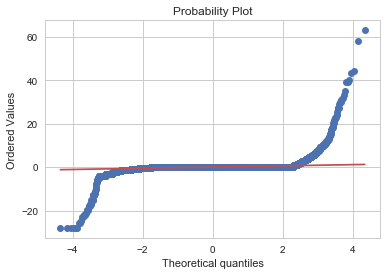

In [80]:
sp.stats.probplot(result1_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

##### 1) tmax~cool까지의 VIF를 본다.

In [21]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill',
       'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY',
       'nothing', 'store_nbr', 'item_nbr', 'log1p_units'],
      dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax','tmin','tavg','dewpoint','wetbulb','heat','cool','preciptotal','stnpressure','sealevel','resultspeed','avgspeed','relative_humility','windchill']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,tmax
1,inf,tmin
2,inf,tavg
3,2.313643e+03,dewpoint
4,2.393536e+03,wetbulb
5,1.953724e+02,heat
6,8.507883e+00,cool
7,1.736504e+00,preciptotal
8,1.069227e+06,stnpressure
9,1.056316e+06,sealevel


tmax, tmin, tavg를 빼고 df2_1을 다시 OLS돌려본다(위로위로~)

##### VIF : 2) dewpoint, wetbulb, heat, cool로 VIF를 돌려본다.

In [19]:
cols = ['dewpoint','wetbulb','heat','cool','preciptotal','stnpressure','sealevel','resultspeed','avgspeed','relative_humility','windchill']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,1770.703915,dewpoint
1,2052.439796,wetbulb
2,185.375947,heat
3,8.218887,cool
4,1.709148,preciptotal
5,996940.265945,stnpressure
6,993870.144580,sealevel
7,46.237679,resultspeed
8,78.296404,avgspeed
9,573.113183,relative_humility


df2_1에서 stnpressure를 제거하고 OLS돌려본다.

##### VIF : stnpressure제거 후 다시 돌리자.

In [21]:
cols = ['dewpoint','wetbulb','heat','cool','preciptotal','sealevel','resultspeed','avgspeed','relative_humility','windchill']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,1736.061199,dewpoint
1,2051.542965,wetbulb
2,184.819909,heat
3,8.148256,cool
4,1.686855,preciptotal
5,1770.850268,sealevel
6,45.780177,resultspeed
7,77.253694,avgspeed
8,555.438893,relative_humility
9,1778.998992,windchill


wetbulb를 버린다.

### VIF : wetbulb 버리고 다시 

In [23]:
cols = ['dewpoint','heat','cool','preciptotal','sealevel','resultspeed','avgspeed','relative_humility','windchill']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,1315.657260,dewpoint
1,180.057891,heat
2,7.998142,cool
3,1.683675,preciptotal
4,1493.442880,sealevel
5,45.748675,resultspeed
6,76.368262,avgspeed
7,545.267939,relative_humility
8,1629.469893,windchill


### VIF : windchill 버리고 다시 

In [25]:
cols = ['dewpoint','heat','cool','preciptotal','sealevel','resultspeed','avgspeed','relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,558.751841,dewpoint
1,138.573141,heat
2,6.868245,cool
3,1.656895,preciptotal
4,235.505556,sealevel
5,45.669636,resultspeed
6,68.236896,avgspeed
7,254.681437,relative_humility


### VIF : dewpoint 버리고 다시 

In [29]:
cols = ['heat','cool','preciptotal','sealevel','resultspeed','avgspeed','relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,3.028590,heat
1,1.520543,cool
2,1.645325,preciptotal
3,41.736746,sealevel
4,45.658258,resultspeed
5,68.206265,avgspeed
6,26.675338,relative_humility


### VIF : avgspeed 버리고 다시 

In [31]:
cols = ['heat','cool','preciptotal','sealevel','resultspeed','relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,3.027904,heat
1,1.520153,cool
2,1.438232,preciptotal
3,34.256163,sealevel
4,4.075404,resultspeed
5,25.767015,relative_humility


### VIF : sealevel 버리고 다시 

In [33]:
cols = ['heat','cool','preciptotal','resultspeed','relative_humility']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,2.702577,heat
1,1.442833,cool
2,1.270203,preciptotal
3,3.294727,resultspeed
4,3.719539,relative_humility


### VIF 결과 : OLS 성능

In [27]:
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(item_nbr) + "C(weekend) + 0', data = df2_1)
result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     5920.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:22:01   Log-Likelihood:             1.0568e+05
No. Observations:              100227   AIC:                        -2.111e+05
Df Residuals:                  100116   BIC:                        -2.101e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(item_nbr)[1]            0      0.003  

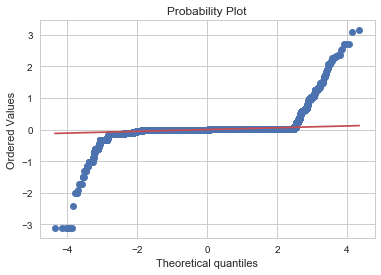

In [36]:
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### case: 
- 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + tmax/tmin/tavg제거 + wetbulb/dewpoint(VIF에 근거) + sealevel/stnpressure제거 + resultdir제거(전부 p-value가 유의하지 않음) + item_nbr제거(하나빼고 다 유의하지 않음)

In [75]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.625
Date:                Wed, 04 Jul 2018   Prob (F-statistic):             0.0324
Time:                        16:06:16   Log-Likelihood:                 4699.6
No. Observations:              100227   AIC:                            -9353.
Df Residuals:                  100204   BIC:                            -9134.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

- R square 0.000, conditional number 30.6. 
- conditional을 확 줄이는 대신 R square도 확 증발시킴.

### 10. Cross validation(교차검증)

In [29]:
from patsy import dmatrix

In [30]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [31]:
len(df2_1_X), len(df2_1_target)

(100227, 100227)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [32]:
formula = 'C(item_nbr) + 0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.9807425 , 0.97825984, 0.97998956, 0.80249672, 0.81610097,
       0.90654638, 0.83012884, 0.72024399, 0.80452507, 0.83206514])

### station 평균성능

In [60]:
scores.mean() 

0.86524728873780565

현재의 모델을 사용해도 될 것으로 판단.

In [34]:
model2_1_1 = sm.OLS.from_formula('log1p_units ~ C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     5920.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:25:38   Log-Likelihood:             1.0568e+05
No. Observations:              100227   AIC:                        -2.111e+05
Df Residuals:                  100116   BIC:                        -2.101e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(item_nbr)[1]            0      0.003  